In [1]:
## Multi class classification with Linear SVC

In [1]:
import pandas as pd
import numpy as np
import scipy
from nltk.corpus import stopwords
import re
import os

In [2]:
## Loading Data - labelled data :

data_1 = pd.ExcelFile('R2_RNN_Tranzact_Rohan_1_Regrouped_with_supplier.xlsx')
tranzact_data_1 = data_1.parse(0)

## Loading Data - un-labelled data:

data_2 = pd.ExcelFile('14Mar_Gorky_one_labelled.xlsx')
tranzact_data_new_1 = data_2.parse(0)


In [3]:
## Picking up required info from labelled data :

col = ['to_company_name', 'supplier_item_id.2', 'product', 'supplier']
tranzact_data_2 = tranzact_data_1[col]
tranzact_data_2.columns = ['OEM', 'item', 'product', 'supplier']

## Picking up required info from un-labelled data:

col = ['from_company_name', 'buyer_item_name', 'product', 'to_company_name']
tranzact_data_new_2 = tranzact_data_new_1[col]
tranzact_data_new_2.columns = ['OEM', 'item', 'product', 'supplier']

# Creating separate dataframe for Cesare Bonetti International Pvt. Ltd. from labelled Dat:

tranzact_data_cesare_international_1 = tranzact_data_2.loc[tranzact_data_2['OEM'] \
                                                               == 'CESARE BONETTI INTERNATIONAL PVT. LTD.']
tranzact_data_2_revised = tranzact_data_2.drop(tranzact_data_cesare_international_1.index)
tranzact_data_cesare_international_1 = tranzact_data_cesare_international_1.reset_index(drop=True)
tranzact_data_2_revised = tranzact_data_2_revised.reset_index(drop=True)

# Creating separate dataframe for Cesare Bonetti International Pvt. Ltd. from unlabelled data :

tranzact_data_cesare_international_2 = tranzact_data_new_2.loc[tranzact_data_new_2['OEM'] \
                                                               == 'CESARE BONETTI INTERNATIONAL PVT. LTD.']
tranzact_data_new_2_revised = tranzact_data_new_2.drop(tranzact_data_cesare_international_2.index)
tranzact_data_cesare_international_2 = tranzact_data_cesare_international_2.reset_index(drop=True)
tranzact_data_new_2_revised = tranzact_data_new_2_revised.reset_index(drop=True)


print('Labelled Data(tranzact_data_2_revised) = ', len(tranzact_data_2_revised))
print('Unlabelled Data(tranzact_data_new_2_revised) = ', len(tranzact_data_new_2_revised))
print('Bonetti International extracted frm labelled data = ', len(tranzact_data_cesare_international_1))
print('Bonetti International extracted frm un-labelled data = ', len(tranzact_data_cesare_international_2))


Labelled Data(tranzact_data_2_revised) =  11803
Unlabelled Data(tranzact_data_new_2_revised) =  11842
Bonetti International extracted frm labelled data =  1754
Bonetti International extracted frm un-labelled data =  5909


In [4]:
# Removing all 'Bonetti' & 'Waaree' supplier from both labelled and un-labelled data :

## First make Items in lower case and remove rows with any cell value = none :

tranzact_data_2_revised['item'] = tranzact_data_2_revised['item'].map(lambda x: x if type(x)!=str else x.lower()) 
tranzact_data_2_revised['product'] = tranzact_data_2_revised['product'].map(lambda x: x if type(x)!=str else x.lower())
tranzact_data_2_revised['supplier'] = tranzact_data_2_revised['supplier'].map(lambda x: x if type(x)!=str else x.lower())
#tranzact_data_2_revised = tranzact_data_2_revised.dropna() ## remove rows with cell value none

tranzact_data_new_2_revised['item'] = tranzact_data_new_2_revised['item'].map(lambda x: x if type(x)!=str else x.lower())
tranzact_data_new_2_revised['product'] = tranzact_data_new_2_revised['product'].map(lambda x: x if type(x)!=str else x.lower())
tranzact_data_new_2_revised['supplier'] = tranzact_data_new_2_revised['supplier'].map(lambda x: x if type(x)!=str else x.lower())
#tranzact_data_new_2_revised = tranzact_data_new_2_revised.dropna() ## remove rows with cell value none

# Removing string 'bonetti' and 'waaree' from supplier :

supplier_bonetti_2 = tranzact_data_2_revised[tranzact_data_2_revised['supplier'].str.contains('bonetti')]
supplier_waaree_2 = tranzact_data_2_revised[tranzact_data_2_revised['supplier'].str.contains('waaree')]
supplier_bonetti_new_2 = tranzact_data_new_2_revised[tranzact_data_new_2_revised['supplier'].str.contains('bonetti')]
supplier_waaree_new_2 = tranzact_data_new_2_revised[tranzact_data_new_2_revised['supplier'].str.contains('waaree')]

tranzact_data_3 = tranzact_data_2_revised.drop(supplier_bonetti_2.index) # 'bonetti' removed
tranzact_data_3 = tranzact_data_3.drop(supplier_waaree_2.index)   # 'waaree' removed
tranzact_data_new_3 = tranzact_data_new_2_revised.drop(supplier_bonetti_new_2.index)
tranzact_data_new_3 = tranzact_data_new_3.drop(supplier_waaree_new_2.index)

tranzact_data_3 = tranzact_data_3.reset_index(drop=True)
tranzact_data_new_3 = tranzact_data_new_3.reset_index(drop=True)

print(len(tranzact_data_3))
print(len(tranzact_data_new_3))

tranzact_data_new_3.head()


10546
11078


,OEM,item,product,supplier
0,Polfrost Air Con Pvt Ltd.,emerson liquid line filter/drier ek-165s (0476...,NaN,h j international
1,Nandan GSE Pvt Ltd,"hydraulic fittings - cramping nipple - 3/8"" x ...",NaN,asiatic hydraulics
2,Nandan GSE Pvt Ltd,hydraulic fitting - hose clip elbow 1/4 x 5/16,NaN,asiatic hydraulics
3,Nandan GSE Pvt Ltd,"hydraulic hose pipe - hose pipe 3/4"" x 500mm",NaN,asiatic hydraulics
4,Nandan GSE Pvt Ltd,"hydraulic hose pipe - hose pipe 3/4"" x 3 mtr 6...",NaN,asiatic hydraulics


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Merging two data frames :

tranzact_data_combined = pd.concat([tranzact_data_3, tranzact_data_new_3], axis=0, ignore_index=True)

# Removing duplicate (item + supplier) combinations :

tranzact_data_combined['find_duplicate'] = tranzact_data_combined['item'].map(str) + \
                                            tranzact_data_combined['supplier'].map(str)

tranzact_data_combined.drop_duplicates(subset='find_duplicate', keep = 'first', inplace = True)
tranzact_data_combined = tranzact_data_combined.reset_index(drop=True)

print(len(tranzact_data_combined))


21371


In [252]:
tranzact_data_combined.to_excel(r'/home/scar3crow/Downloads/18_04_test_1.xlsx')

In [7]:
## cleaning the data

pd.options.mode.chained_assignment = None

## Join all hyphaned words :

tranzact_data_combined['item'] = tranzact_data_combined['item'].str.replace(r'([a-z])-([a-z])', r'\1\2')
tranzact_data_combined['item'] = tranzact_data_combined['item'].str.replace(r'([0-9])-([a-z])', r'\1\2')

## Removing underscores '_':

punctuation = ['_']

for i in punctuation:
    
    tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(i," ")

tranzact_data_combined['item'] = tranzact_data_combined['item'].str.replace(r'\W',' ')   ## remove puntuations


In [254]:
tranzact_data_combined.to_excel(r'/home/scar3crow/Downloads/18_04_test_2.xlsx')

In [8]:
## joinning consecutive single letters - SS:

s_s_list = pd.DataFrame()
s_s_list['item'] = tranzact_data_combined['item'].str.findall(r'(?i)\b[s]\s+\b[s]\b')    
s_s_list_index = tranzact_data_combined[tranzact_data_combined['item'].str.contains(r'(?i)\b[s]\s+\b[s]\b')].index.values
s_s_list = s_s_list[s_s_list.astype(str)['item'] != '[]']
s_s_list['joined'] = s_s_list.item.apply(''.join)
s_s_list.joined = s_s_list.joined.str.replace(' ', '')

## joinning consecutive single letters - MS:

ms_list = pd.DataFrame()
ms_list['item'] = tranzact_data_combined['item'].str.findall(r'(?i)\b[m]\s+\b[s]\b')    
ms_list_index = tranzact_data_combined[tranzact_data_combined['item'].str.contains(r'(?i)\b[m]\s+\b[s]\b')].index.values
ms_list = ms_list[ms_list.astype(str)['item'] != '[]']
ms_list['joined'] = ms_list.item.apply(''.join)
ms_list.joined = ms_list.joined.str.replace(' ', '')

## joinning consecutive single letters - CI:

ci_list = pd.DataFrame()
ci_list['item'] = tranzact_data_combined['item'].str.findall(r'(?i)\b[c]\s+\b[i]\b')    
ci_list_index = tranzact_data_combined[tranzact_data_combined['item'].str.contains(r'(?i)\b[c]\s+\b[i]\b')].index.values
ci_list = ci_list[ci_list.astype(str)['item'] != '[]']
ci_list['joined'] = ci_list.item.apply(''.join)
ci_list.joined = ci_list.joined.str.replace(' ', '')

## joinning consecutive single letters - CS:

cs_list = pd.DataFrame()
cs_list['item'] = tranzact_data_combined['item'].str.findall(r'(?i)\b[c]\s+\b[s]\b')    
cs_list_index = tranzact_data_combined[tranzact_data_combined['item'].str.contains(r'(?i)\b[c]\s+\b[s]\b')].index.values
cs_list = cs_list[cs_list.astype(str)['item'] != '[]']
cs_list['joined'] = cs_list.item.apply(''.join)
cs_list.joined = cs_list.joined.str.replace(' ', '')


In [9]:
## substituting above cell in tranzact_data_combine :

for i in s_s_list_index:    
    [tranzact_data_combined['item'][i]] = [re.sub(r'(?i)\b[s]\s+\b[s]\b', s_s_list['joined'][i], a) \
                                           for a in [tranzact_data_combined['item'][i]]]
    
for i in ms_list_index:    
    [tranzact_data_combined['item'][i]] = [re.sub(r'(?i)\b[m]\s+\b[s]\b', ms_list['joined'][i], a) \
                                           for a in [tranzact_data_combined['item'][i]]]
    
for i in ci_list_index:    
    [tranzact_data_combined['item'][i]] = [re.sub(r'(?i)\b[c]\s+\b[i]\b', ci_list['joined'][i], a) \
                                           for a in [tranzact_data_combined['item'][i]]]
    
for i in cs_list_index:    
    [tranzact_data_combined['item'][i]] = [re.sub(r'(?i)\b[c]\s+\b[s]\b', cs_list['joined'][i], a) \
                                           for a in [tranzact_data_combined['item'][i]]]


In [257]:
tranzact_data_combined.to_excel(r'/home/scar3crow/Downloads/18_04_test_3.xlsx')

In [10]:
# making list for joinning is with number(indian standards):
is_list = pd.DataFrame()
is_list['item'] = tranzact_data_combined['item'].str.findall(r'\b\is\s+\d+\b')
is_list_index = tranzact_data_combined[tranzact_data_combined['item'].str.contains(r'\b\is\s+\d+\b')].index.values
is_list = is_list[is_list.astype(str)['item'] != '[]']
is_list['joined'] = is_list.item.apply(''.join)
is_list.joined = is_list.joined.str.replace(' ', '')

# making list for joinning en with number(en standards):
en_list = pd.DataFrame()
en_list['item'] = tranzact_data_combined['item'].str.findall(r'\b\en\s+\d+\b')
en_list_index = tranzact_data_combined[tranzact_data_combined['item'].str.contains(r'\b\en\s+\d+\b')].index.values
en_list = en_list[en_list.astype(str)['item'] != '[]']
en_list['joined'] = en_list.item.apply(''.join)
en_list.joined = en_list.joined.str.replace(' ', '')
2,
# making list for joinning ss with number(ss standards):
ss_list = pd.DataFrame()
ss_list['item'] = tranzact_data_combined['item'].str.findall(r'\bs\w\s+\d{2,3}\b')
ss_list_index = tranzact_data_combined[tranzact_data_combined['item'].str.contains(r'\bs\w\s+\d{2,3}\b')].index.values
ss_list = ss_list[ss_list.astype(str)['item'] != '[]']
ss_list['joined'] = ss_list.item.apply(''.join)
ss_list.joined = ss_list.joined.str.replace(' ', '')

# making list for joinning fg with number(casting standards):
fg_list = pd.DataFrame()
fg_list['item'] = tranzact_data_combined['item'].str.findall(r'\b[f]\g\s+\d+\b')
fg_list_index = tranzact_data_combined[tranzact_data_combined['item'].str.contains(r'\b[f]\g\s+\d+\b')].index.values
fg_list = fg_list[fg_list.astype(str)['item'] != '[]']
fg_list['joined'] = fg_list.item.apply(''.join)
fg_list.joined = fg_list.joined.str.replace(' ', '')


In [11]:
## substituting above cell in tranzact_data_combine :

for i in is_list_index:    
    [tranzact_data_combined['item'][i]] = [re.sub(r'\b\is\s+\d+\b', is_list['joined'][i], a) \
                                           for a in [tranzact_data_combined['item'][i]]]
    
for i in en_list_index:    
    [tranzact_data_combined['item'][i]] = [re.sub(r'\b\en\s+\d+\b', en_list['joined'][i], a) \
                                           for a in [tranzact_data_combined['item'][i]]]
    
for i in ss_list_index:    
    [tranzact_data_combined['item'][i]] = [re.sub(r'\bs\w\s+\d{2,3}\b', ss_list['joined'][i], a) \
                                           for a in [tranzact_data_combined['item'][i]]]
    
for i in fg_list_index:    
    [tranzact_data_combined['item'][i]] = [re.sub(r'\b[f]\g\s+\d+\b', fg_list['joined'][i], a) \
                                           for a in [tranzact_data_combined['item'][i]]]

In [95]:
print(tranzact_data_combined['item'][6675])

ss316 perforatedsheet 1 mm hole x 0 50 mm thck


In [12]:
## Remove dimensions alongwith units(mm etc) and lastly integers :

tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\b\d+x\d+x\d+\w*\b',' ')
tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\b\d+x\d+\w*\b',' ')
tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\b\d+\w*\b',' ')
tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\bx\w+\b',' ')

tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\b\id\s*\d+\b',' ')
tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\b\od\s*\d+\b',' ')
tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\bd\ia\s*\d+\b',' ')
tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\bd\s*\d+\b',' ')

## Remove m8 etc. :

tranzact_data_combined['item'] = tranzact_data_combined['item'].str.replace(r'\b\m\d+\b',' ')
tranzact_data_combined['item']= tranzact_data_combined['item'].str.replace(r'\b\m\d+x\w+\b',' ')

## Breaking some words like 'perforatedsheet' etc.:

tranzact_data_combined['item'] = tranzact_data_combined['item'].str.replace(r'\b\perforatedsheet\b','perforated sheet')


## Remove bad words as per list below :
, 
bad_ist = ['mm', 'inch', 'ft', 'feet', 'mtr', 'volt', 'amp', 'micron', 'microns', 'swg', 'cfm', 'kg', \
           'tons', 'mfd', 'ah', 'id', 'od', 'dia', 'to', 'for', 'x']

tranzact_data_combined['item']= tranzact_data_combined['item'].apply(lambda x:' '.join([i for i in x.split()
                                                                                if i not in bad_ist]).lower())



tranzact_data_combined = tranzact_data_combined.reset_index(drop=True)

In [13]:
print(tranzact_data_combined['item'][6675])

ss316 perforated sheet hole thck


In [261]:
tranzact_data_combined.to_excel(r'/home/scar3crow/Downloads/17_04_test_3.xlsx')

In [14]:
# Splitting data into labelled and unlabelled :

tranzact_data_labelled = pd.DataFrame()
tranzact_data_unlabelled = pd.DataFrame()

tranzact_data_labelled = tranzact_data_combined[tranzact_data_combined['product'].notnull()]
tranzact_data_labelled = tranzact_data_labelled.dropna() ## remove any other rows with cell value none
tranzact_data_unlabelled = tranzact_data_combined.drop(tranzact_data_labelled.index)


tranzact_data_labelled = tranzact_data_labelled.reset_index(drop=True)
tranzact_data_unlabelled = tranzact_data_unlabelled.reset_index(drop=True)

In [15]:
print(len(tranzact_data_labelled))

tranzact_data_labelled.drop_duplicates(subset='item', keep = 'first', inplace = True)

print(len(tranzact_data_labelled))

10883
6334


In [58]:
tranzact_data_labelled.to_excel(r'/home/scar3crow/Downloads/tranzact_data_labelled.xlsx')

In [16]:
# digitising 'product' and creating a dictionary :

tranzact_data_labelled['product_id'] = tranzact_data_labelled['product'].factorize()[0]

product_id_df = tranzact_data_labelled[['product', 'product_id']].drop_duplicates().sort_values('product_id')
product_to_id = dict(product_id_df.values)
id_to_product = dict(product_id_df[['product_id', 'product']].values)


934


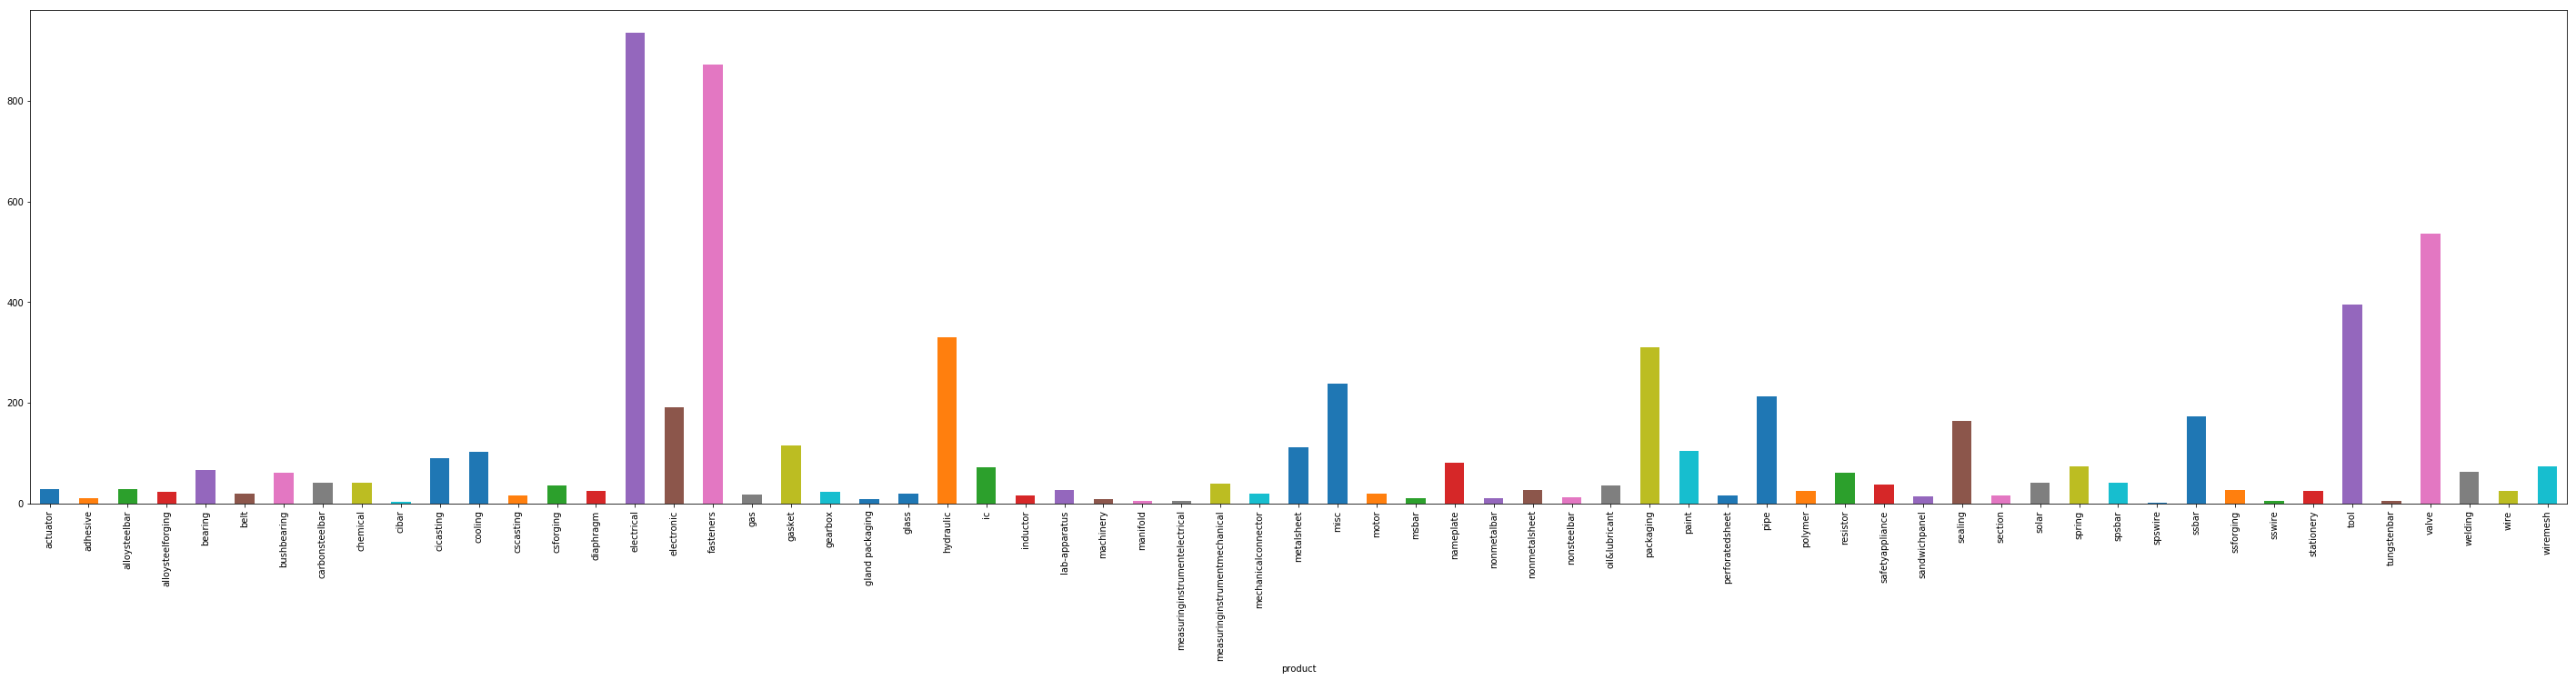

In [17]:
## To show distribution of product category

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(50,10))
print(max(tranzact_data_labelled.groupby('product').item.count()))
tranzact_data_labelled.groupby('product').item.count().plot.bar(ylim=0)
plt.show()

## Pl. note the unbalance distribution of product categories. In category Fasteners, there are 1736 items(maxm no.)

In [18]:
## Gives the product wise item distribution. In some product categories there are only 1 item.
from collections import Counter
Counter(tranzact_data_labelled["product"])

Counter({'actuator': 29,
         'adhesive': 12,
         'alloysteelbar': 30,
         'alloysteelforging': 23,
         'bearing': 67,
         'belt': 21,
         'bushbearing': 61,
         'carbonsteelbar': 41,
         'chemical': 41,
         'cibar': 4,
         'cicasting': 91,
         'cooling': 104,
         'cscasting': 17,
         'csforging': 37,
         'diaphragm': 26,
         'electrical': 934,
         'electronic': 191,
         'fasteners': 872,
         'gas': 19,
         'gasket': 116,
         'gearbox': 24,
         'gland packaging': 10,
         'glass': 21,
         'hydraulic': 330,
         'ic': 73,
         'inductor': 16,
         'lab-apparatus': 28,
         'machinery': 9,
         'manifold': 6,
         'measuringinstrumentelectrical': 6,
         'measuringinstrumentmechanical': 40,
         'mechanicalconnector': 21,
         'metalsheet': 113,
         'misc': 238,
         'motor': 21,
         'msbar': 11,
         'nameplate': 82,
     

In [19]:
## Creating X and y variables for training. X = Items or item 'feature'. y = 'product' or product category

X = []
for i in range(tranzact_data_labelled.shape[0]):
    X.append(tranzact_data_labelled.iloc[i][1])
y = np.array(tranzact_data_labelled["product"])

print(X[0])


new cylinder gas


In [20]:
#train test split in 80% / 20% ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)


In [54]:
## Creating the pipeline for learning which include vectorizing and training with 
## Support Vector Classifier with Linear Kernel :

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier


model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))), \
                  ('tfidf', TfidfTransformer(norm='l2', use_idf=True)), \
                  ('clf', OneVsRestClassifier(LinearSVC(C=10, class_weight = 'balanced')))])

In [22]:
my_vectorizer = TfidfVectorizer(norm='l2', ngram_range=(1, 2), use_idf = True)
train_digital = my_vectorizer.fit_transform(tranzact_data_labelled.item).toarray()
train_label = (tranzact_data_labelled['product'])
train_digital.shape
#model_new = Pipeline([('tfidf'), ('clf', OneVsRestClassifier(LinearSVC(class_weight = 'balanced')))])

(6334, 16583)

In [23]:
#model_new = SVC(class_weight = 'balanced')
X_train_new, X_test_new, y_train_new, y_test_new, indices_train, indices_test = train_test_split(train_digital, \
                                                                train_label, tranzact_data_labelled.index, test_size=0.20, random_state=0)
#model_new.fit(X_train_new, y_train_new)
#y_pred_new = model_new.predict(X_test_new)

#from sklearn.metrics import confusion_matrix, accuracy_score

#model_accuracy = accuracy_score(y_pred_new, y_test_new)

#print(model_accuracy)


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
models = [OneVsRestClassifier(LinearSVC(C=1 , class_weight = 'balanced')), SGDClassifier(loss='modified_huber', \
                                                                                        penalty = 'l2', class_weight='balanced', n_iter=100, alpha = .01)]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for modl in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(modl, X_train_new, y_train_new, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [50]:
print("Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))
cv_df

Accuracy: 0.73 (+/- 0.01)


,model_name,fold_idx,accuracy
0,Pipeline,0,0.904624
1,Pipeline,1,0.897661
2,Pipeline,2,0.894685
3,Pipeline,3,0.911000
4,Pipeline,4,0.898683
5,Pipeline,0,0.734104
6,Pipeline,1,0.729045
7,Pipeline,2,0.730315
8,Pipeline,3,0.740000
9,Pipeline,4,0.738602


In [56]:
model_1 = SGDClassifier(loss='squared_hinge', penalty = 'l2', class_weight='balanced', n_iter=500, alpha = .01)

In [ ]:
## Find average F1 score of cross validation subset of training data. CV subset choosen thr' StratifiedKFold
## for unbalanced data :

from sklearn.model_selection import StratifiedKFold

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
new_scores = cross_val_score(model_1, X_train_new, y_train_new, cv=k_fold, n_jobs=1, scoring = 'f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (new_scores.mean(), new_scores.std() * 2))


In [53]:
print("Accuracy: %0.2f (+/- %0.2f)" % (new_scores.mean(), new_scores.std() * 2))


Accuracy: 0.84 (+/- 0.04)


In [45]:
#fit model with training data

model.fit(X_train, y_train)

#evaluation on test data

pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

model_accuracy = accuracy_score(pred, y_test)

print(model_accuracy)


0.9068666140489345


In [57]:
# Creating dataframe for checking actual label vs, predicted label :

pred_test_df = pd.DataFrame({'item': X_test, 'product': y_test.tolist(), 'prediction': pred.tolist()})
pred_test_unmatched = pred_test_df[pred_test_df['prediction'] != pred_test_df['product']]
pred_test_unmatched.to_excel(r'/home/scar3crow/Downloads/accu_check_2.xlsx')

In [62]:
# Prediction of unlabelled data :

X_unlabelled = []
for i in range(tranzact_data_unlabelled.shape[0]):
    X_unlabelled.append(tranzact_data_unlabelled.iloc[i][1])
    
predict_unlabelled = model.predict(X_unlabelled)

predict_unlabelled_df = pd.DataFrame({'item': X_unlabelled, 'prediction': predict_unlabelled.tolist()})
predict_unlabelled_df.to_excel(r'/home/scar3crow/Downloads/umlabelled_check.xlsx')

In [64]:
predict_unlabelled_df.tail()

,item,prediction
10368,polybag pp,electrical
10369,polybag pp,electrical
10370,handle nut htb a194 gr8,fasteners
10371,round bar astm a276 type,ssbar
10372,pp monobox st5,electrical


In [23]:
tranzact_data_unlabelled.tail()

,OEM,item,product,supplier,find_duplicate
10490,CESARE BONETTI INDIA PVT. LTD.,inside caliper size,NaN,ankit marketing pvt. ltd.,inside caliper size 12''ankit marketing pvt. ltd.
10491,CESARE BONETTI INDIA PVT. LTD.,ms wire brush diameter,NaN,damodar enterprises,ms wire brush diameter 24mm x 6mmdamodar enter...
10492,CESARE BONETTI INDIA PVT. LTD.,ms wire brush diameter,NaN,damodar enterprises,ms wire brush diameter 12mm x 6mmdamodar enter...
10493,CESARE BONETTI INDIA PVT. LTD.,handle nut htb a194 gr8,NaN,shah brothers,"handle nut 1"" #600,htb,a194 gr8shah brothers"
10494,Entech Controls,round bar astm a276 type,NaN,alpesh metals,round bar od50 astm a276 type 431alpesh metals


In [29]:
## Input Item name here in the syntax given below :

Input_Item_Name = ['perforated plate']

In [30]:
## Find product category here :
Output_Product_Category = model.predict(Input_Item_Name)
print('Product Category = ', Output_Product_Category)
output_cat_list = Output_Product_Category.tolist()


Product Category =  ['perforatedsheet']


In [120]:
## Saving the learned model :
from sklearn.externals import joblib

filename = 'svm_model_19_4_19.sav'
joblib.dump(model, filename)


['svm_model_19_4_19.sav']

In [ ]:
# load the model from disk
loaded_model = joblib.load(svm_model)

In [26]:
## creating data search file of all items of same category :

tranzact_data_search = tranzact_data_labelled.loc[tranzact_data_labelled['product'] \
                                                               == output_cat_list[0]]


tranzact_data_search = tranzact_data_search.reset_index(drop=True)
print(len(tranzact_data_search))
tranzact_data_search.head()

1201


,OEM,item,product,supplier,find_duplicate,product_id
0,Truefit Engineering Company Limited,cable tie,electrical,goldlink technocast,cable tie 6 inchgoldlink technocast,18
1,LE Electronics Pvt Ltd,way bar graph red face greay,electrical,alpesh metals,10 way bar graph (red) (face: greay)alpesh metals,18
2,LE Electronics Pvt Ltd,led bar red lb714sr,electrical,max forge,led bar 14 x 7.5 red (lb714sr)max forge,18
3,Atomberg Technologies Private Limited,batteries eveready,electrical,n m automation and control private limited,batteries evereadyn m automation and control p...,18
4,GREENWAY GRAMEEN INFRA PVT LTD,battery,electrical,superb auto batteries,batterysuperb auto batteries,18


In [27]:

from sklearn.feature_extraction.text import TfidfVectorizer

my_vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', ngram_range=(1, 2), use_idf = True)
#digital_features = my_vectorizer.fit(tranzact_data_search['feature'])
#my_vector = digital_features.transform(tranzact_data_search['feature']).toarray()


## Creating test vector from Text features :

merge_text_feature = []
merge_text_feature_digit = []
merge_digit_vector = []
test_digit_vector = []

merge_text_feature = tranzact_data_search['item'].append(pd.Series(Input_Item_Name))

merge_text_feature = merge_text_feature.reset_index(drop=True)

merge_text_feature_digit = my_vectorizer.fit(merge_text_feature)

# encode document
merge_digit_vector = merge_text_feature_digit.transform(merge_text_feature).toarray()


test_digit_vector = merge_digit_vector[len(merge_digit_vector)-1].reshape((merge_digit_vector.shape)[1],)

merge_digit_vector_1 = merge_digit_vector[0:(len(merge_digit_vector)-1)]

print(merge_digit_vector_1.shape)
print(test_digit_vector.shape)



(1201, 3286)
(3286,)


In [30]:
print(type(merge_text_feature))

<class 'pandas.core.series.Series'>


In [28]:
## Cosine Similarity :

def cos_cdist(matrix, vector):
    v = vector.reshape(1, -1)
    return scipy.spatial.distance.cdist(matrix, v, 'cosine').reshape(-1)

## Finding cosine similarity & picking 50 top similar lines :

c_d = []

c_d = np.round((1 - cos_cdist(merge_digit_vector_1, test_digit_vector)), 3)

max_c_s_index = []
max_c_s_index = np.argsort(c_d)[-50:][::-1]
print(max_c_s_index)

[1200  393  395  396  397  398  399  400  401  402  403  404  405  406
  407  408  409  394  392  411  391  376  377  378  379  380  381  382
  383  384  385  386  387  388  389  390  410  412  599  431  433  434
  435  436  437  438  439  440  441  442]


In [29]:
result = []
result_frame = []
max_c_s_index = []
max_c_s_index = np.argsort(c_d)[-50:][::-1]

for i in max_c_s_index:
    
    result.append(np.array([c_d[i], tranzact_data_search['item'][i], tranzact_data_search['supplier'][i]]))

result_frame = pd.DataFrame(result, columns=['c_index', 'item', 'supplier'])

result_frame.c_index = result_frame.c_index.astype('float64')

result_frame.drop_duplicates(subset='supplier', keep = 'first', inplace = True)
result_frame = result_frame.reset_index(drop=True)

kount = 0

for i in range(len(result_frame['supplier'])):
    if result_frame['c_index'][i] >= 0.10:
        print(result_frame['supplier'][i])
        kount = kount+1
        if kount == 5 :
            break
result_frame.head(10)

,c_index,item,supplier
0,0.0,panel wiring duct pvc,radio service association
1,0.0,diode mmsz5250b mfg part no mmsz5250be3 manufa...,evelta electronics
2,0.0,diode hs1m mfg part no hs1m r2 manufacturer ta...,mouser electronics inc.
3,0.0,tvs diode p6ke100a,rajiv electronics
4,0.0,tvs diode sm712,ruttonsha international rectifier ltd.
5,0.0,shottky diode common cathode dual diode if vr ...,master instrument corporation (india)
6,0.0,diode ss34 smd,ashna enterprises
7,0.0,zener diode zener,shree vishwakarma engineering works
8,0.0,zener diodes make on semiconductor manufacture...,son n naykpura co.
9,0.0,ruttonsha make diode,rachana tools center


In [193]:
merge_text_feature = []
merge_digit_vector = []
test_digit_vector = []

merge_text_feature = tranzact_data_search['feature'].append(pd.Series(Input_Item_Name))

merge_text_feature = merge_text_feature.reset_index(drop=True)

max_length_merge = max([len(s.split()) for s in merge_text_feature])

In [194]:
print(max_length_merge)
merge_text_feature.head()

30


0                  cable tie inch
1    way bar graph red face greay
2             led bar red lb714sr
3              batteries eveready
4               battery cr2032 3v
dtype: object

In [195]:
from gensim.models import Word2Vec

from tqdm import tqdm

merge_text_feature = []
merge_digit_vector = []
test_digit_vector = []

merge_text_feature = tranzact_data_search['feature'].append(pd.Series(Input_Item_Name))

merge_text_feature = merge_text_feature.reset_index(drop=True)

temp_corpus = merge_text_feature.map(lambda x: x.split('.'))

corpus = []
for i in tqdm(range(len(temp_corpus))):
    for line in temp_corpus[i]:
        words = [x for x in line.split()]
        corpus.append(words)

100%|██████████| 1258/1258 [00:00<00:00, 52876.44it/s]


In [91]:
print(len(corpus[0]))

3


In [196]:
## items to word2vec :

emb_dim = 100

model_1 = Word2Vec(corpus, size = emb_dim, window=2, \
               min_count=1, negative = 15, iter = 15, workers = 10, sg=1)

vocab_size = len(model_1.wv.vocab)

print(vocab_size)

print(model_1)

1711
Word2Vec(vocab=1711, size=100, alpha=0.025)


In [197]:
from keras.preprocessing.text import Tokenizer

tokenizer_merge = Tokenizer()
tokenizer_merge.fit_on_texts(merge_text_feature)

max_length_merge = max([len(s.split()) for s in merge_text_feature])
                        
tokenizer_merge_index = tokenizer_merge.word_index

vocab_size_merge = len(tokenizer_merge_index)
print(tokenizer_merge_index)                        

{'sod523': 1047, 'graph': 673, 'fanuc': 682, 'mmx4core': 1209, 'tpwcapacitor': 849, 'coolig': 1194, 'marker': 291, 'id6mm': 602, 'bus': 1684, 'b48': 1244, 'p1212': 633, '45w': 1606, '2h': 1259, 'running': 499, 'adapter': 638, 'mic': 956, 'ul': 1580, '5mtr': 635, 'miscellaneous': 1498, 'bss138': 1331, '14s': 896, '12pf': 495, 'battery': 106, 'qevmetalwork': 41, 'systems': 594, '57a': 385, 'double': 723, 'florex': 1077, '1uf': 77, 'schneider': 195, 'al': 1242, '10ma': 743, 'shavison': 1436, 'id8mm': 603, 'cuttoff': 648, '600vac': 1338, 'mfs201': 1414, 'wago': 889, 'vj1206y102jxaac': 786, 'class': 360, 'current': 200, 'tantalum': 361, '1p': 1308, 'leaded': 93, 'electronic': 713, 'c840': 1263, '1kv': 182, 'sugar': 1150, 'three': 436, '25lg': 1393, 'sw': 519, '500w': 1442, 'core': 10, 'tracer': 350, 'cordtpw': 1346, 'zerocrossover5mmal': 1341, '2e': 585, 'copper': 22, 'epcos': 305, 'p2as2e3p': 1528, '10a': 227, 'to247ac': 1328, 'rv6': 1273, 'efd15h': 1106, 'sb': 1051, 'main': 378, 'do214ac2

In [134]:
print(vocab_size_merge)
print(len(merge_text_feature))
print(corpus[0][2])
print(model_1.wv.get_vector(corpus[0][0]))

1708
1258
inch
[ 0.00531422 -0.08740324 -0.08222257 -0.12899801 -0.15475085 -0.163057
  0.18513985 -0.36062765 -0.32775584 -0.04065453  0.3184027   0.3695678
 -0.5101895   0.03564022 -0.08278285  0.37450826 -0.12547307  0.20521249
 -0.12950574 -0.23542361 -0.04343544  0.18400235  0.02711576  0.15075897
 -0.03023637  0.42508173  0.351758   -0.11873965 -0.10947298 -0.15610208
 -0.43448284 -0.17689821 -0.2501244  -0.03748987 -0.06745612  0.10779626
  0.21494459  0.06624966  0.25569037 -0.11911091 -0.1880119   0.24927732
  0.08494496  0.05017168  0.10188263  0.11363015  0.07888637  0.11526236
 -0.27141827 -0.18781136  0.13344045 -0.01295647 -0.00898362  0.20055954
  0.01691925  0.06470533 -0.23988712  0.13110223 -0.05131466 -0.26941225
 -0.00082231  0.28596535 -0.07595673 -0.23382907 -0.08251759  0.05898278
 -0.31087568 -0.2450818   0.31771743  0.01451331 -0.06168523  0.11082708
  0.09837241 -0.03204493  0.2410294 ]


In [198]:
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
a = [1, 2, 3, 4, 5]
b = np.pad(a, (0,3), 'constant', constant_values=0)
print(b)
print(len(corpus[1]))

[1 2 3 4 5 0 0 0]
6


In [199]:
## Prepare matrix for co-sine similarity:

size_col = max_length_merge * emb_dim

embedding_matrix = np.zeros((len(merge_text_feature), emb_dim))

for i in range(len(merge_text_feature)):
    
    emb_mat = np.zeros((1, emb_dim*len(corpus[i])))
    emb_mat_col = emb_dim*len(corpus[i])
    
    emb_vector = np.zeros((len(corpus[i]), emb_dim))
    for j in range(len(corpus[i])):
        emb_vector[j] = model_1.wv.get_vector(corpus[i][j])
    
      
#    emb_mat = emb_vector.ravel()
    

#    embedding_matrix[i] = np.pad(emb_mat, (0, (size_col - emb_mat_col)), 'constant', constant_values = 0)
        
    embedding_matrix[i] = np.max(emb_vector, axis = 0)
    


        
print(embedding_matrix.shape)
        
#print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))


(1258, 100)


In [125]:
print(embedding_matrix[0])

[ 0.03776038 -0.05264485 -0.09356659 ...  0.          0.
  0.        ]


In [200]:
test_digit_vector = embedding_matrix[len(embedding_matrix)-1].reshape((embedding_matrix.shape)[1],)

merge_digit_vector_1 = embedding_matrix[0:(len(embedding_matrix)-1)]

print(merge_digit_vector_1.shape)
print(test_digit_vector.shape)


(1257, 100)
(100,)


In [201]:
c_d = []

c_d = np.round((1 - cos_cdist(merge_digit_vector_1, test_digit_vector)), 3)

max_c_s_index = []
max_c_s_index = np.argsort(c_d)[-50:][::-1]

result = []
result_frame = []
max_c_s_index = []
max_c_s_index = np.argsort(c_d)[-50:][::-1]

for i in max_c_s_index:
    
    result.append(np.array([c_d[i], tranzact_data_search['feature'][i], tranzact_data_search['supplier'][i]]))

result_frame = pd.DataFrame(result, columns=['c_index', 'feature', 'supplier'])

result_frame.c_index = result_frame.c_index.astype('float64')

result_frame.drop_duplicates(subset='supplier', keep = 'first', inplace = True)
result_frame = result_frame.reset_index(drop=True)

kount = 0

for i in range(len(result_frame['supplier'])):
    if result_frame['c_index'][i] >= 0.10:
        print(result_frame['supplier'][i])
        kount = kount+1
        if kount == 5 :
            break
result_frame.head(10)

DAMODAR ENTERPRISES
Ankit Marketing Pvt. Ltd.
M/S. S. K. Enterprise
IDEAL RESOURCES PRODUTCS PVT. LTD.
A.M Steel Traders


,c_index,feature,supplier
0,1.000,solder iron 35w soldering bit,DAMODAR ENTERPRISES
1,1.000,solder iron 35w,Ankit Marketing Pvt. Ltd.
2,0.999,bottom insulator gv3,M/S. S. K. Enterprise
3,0.999,meanwell 24v smps rs2524,IDEAL RESOURCES PRODUTCS PVT. LTD.
4,0.999,chk coil 3uh 5a,A.M Steel Traders
5,0.999,resistor 100k,CESARE BONETTI INDIA PVT. LTD.
6,0.999,pin plug top 5a anchor,NEHA ENTERPRISES
7,0.999,speed regulator,PANTH ENTERPRISES
8,0.999,stator gv3,WAAREE INDUSTRIES PVT. LTD.
9,0.999,contactor 3tf31,Nemi Electricals
